In [84]:
import numpy as np
import cvxpy as cp
from cvxpy import *
import pylab
from itertools import combinations

In [90]:
def FloorPlanningFixedRectangles(heights, widths, relative_order, p = 0.1):
    n = len(heights)
    assert(len(widths) == n)
    W = cp.Variable(1)
    H = cp.Variable(1)
    X = cp.Variable(n)
    Y = cp.Variable(n)
    constraints = []
    for i in range(n):
        constraints.extend([X[i] >= 0, Y[i] >= 0, X[i] + widths[i] <= W, Y[i] + heights[i] <= H])
    for i, j, t in relative_order:
        if t == 0:
            constraints.append(X[i] + widths[i] + p <= X[j])
        else:
            constraints.append(Y[i] + heights[i] + p <= Y[j])
    objective = cp.Minimize((W + H) * 2) # optimizing perimetr
    prob = cp.Problem(objective, constraints)
    result = prob.solve()
    return X.value, Y.value, W.value, H.value

In [91]:
print(FloorPlanningFixedRectangles([1, 1], [1, 1], [[0, 1, 0]]))

(array([-7.77829747e-11,  1.10000000e+00]), array([2.39223869e-11, 2.39224023e-11]), array([2.1]), array([1.]))


In [92]:
def FloorPlanningFixedMinArea(areas, aspect_ratios, relative_order, p = 0.1):
    n = len(areas)
    assert(len(aspect_ratios) == n)
    W = cp.Variable(1)
    H = cp.Variable(1)
    heights = cp.Variable(n)
    widths = cp.Variable(n)
    X = cp.Variable(n)
    Y = cp.Variable(n)
    constraints = []
    for i in range(n): 
        constraints.extend([X[i] >= 0, Y[i] >= 0, X[i] + widths[i] <= W, Y[i] + heights[i] <= H, widths[i] >= 0, heights[i] >= 0])
        constraints.extend([heights[i] >= aspect_ratios[i][0] * widths[i], heights[i] <= aspect_ratios[i][1] * widths[i]]) # li <= hi / wi <= ri
        constraints.append(geo_mean(vstack([widths[i], heights[i]])) >= np.sqrt(areas[i])) # wi * hi >= area_i
    for i, j, t in relative_order:
        if t == 0:
            constraints.append(X[i] + widths[i] + p <= X[j])
        else:
            constraints.append(Y[i] + heights[i] + p <= Y[j])
    objective = cp.Minimize((W + H) * 2) # optimizing perimetr
    prob = cp.Problem(objective, constraints)
    result = prob.solve()
    return X.value, Y.value, widths.value, heights.value, W.value, H.value

In [93]:
print(FloorPlanningFixedMinArea([1, 1], [[1, 1], [1, 1]], [[0, 1, 0]]))

(array([-1.57415032e-12,  1.10000000e+00]), array([2.33904193e-11, 2.33898949e-11]), array([1., 1.]), array([1., 1.]), array([2.1]), array([1.]))


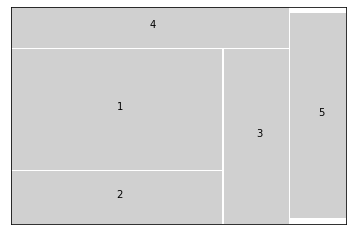

In [94]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def show(X, Y, widths, height, W, H):
    pylab.figure(facecolor='w')
    for i in range(len(X)):
        pylab.fill([X[i], X[i], X[i] + widths[i], X[i] + widths[i]],
                    [Y[i], Y[i]+height[i], Y[i]+height[i], Y[i]],
                    facecolor = '#D0D0D0')
        pylab.text(X[i]+.5*widths[i], Y[i]+.5*height[i], "%d" %(i+1))

    pylab.axis([0, W, 0, H])
    pylab.xticks([])
    pylab.yticks([])

    pylab.show()


areas = [180, 80, 80, 80, 80]
aspect_ratios = [[1/5, 5] for i in range(5)]
relative_order = [[0, 2, 0], [2, 4, 0], [1, 2, 0], [3, 4, 0], [1, 0, 1], [0, 3, 1], [2, 3, 1]]
X, Y, widths, heights, W, H = FloorPlanningFixedMinArea(areas, aspect_ratios, relative_order)
# print(X)
show(X, Y, widths, heights, W, H)